In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

In [2]:
# Load California Housing Dataset
data = fetch_california_housing(as_frame=True)
df = data.frame


In [3]:
# Features (X) and Target (y)
X = df.drop('MedHouseVal', axis=1)  # 'MedHouseVal' is the target (median house value)
y = df['MedHouseVal']

In [4]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
class LinearRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [13]:
 # Train the custom linear regression model
lr_model = LinearRegressionCustom(learning_rate=0.01, epochs=1000)
lr_model.fit(X_train_scaled, y_train)
        

In [14]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [15]:
import random

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class RandomForestCustom:
    def __init__(self, n_trees=10, max_depth=5, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, int(self.sample_size * n_samples), replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        for _ in range(self.n_trees):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = [tree.predict(X) for tree in self.trees]
        return np.mean(predictions, axis=0)

# Ensure X_train_scaled, y_train, and X_test_scaled are numpy arrays
X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train)
X_test_scaled = np.array(X_test_scaled)

# Train the Random Forest model
rf_model = RandomForestCustom(n_trees=10, max_depth=5)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

print("Predictions:", y_pred_rf)


Predictions: [0.94662949 1.05724354 3.64135012 ... 4.88781012 1.05724354 1.71793835]


In [22]:
class XGBoostCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        residuals = y
        for _ in range(self.n_estimators):
            # Use sklearn DecisionTreeRegressor for simplicity
            from sklearn.tree import DecisionTreeRegressor
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, residuals)
            self.trees.append(tree)
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions


# Train the XGBoost model
xgb_model = XGBoostCustom(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Evaluate Linear Regression
rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

# Evaluate Random Forest
rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

# Evaluate XGBoost
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)

print("Linear Regression: RMSE =", rmse_lr, ", R² =", r2_lr)
print("Random Forest: RMSE =", rmse_rf, ", R² =", r2_rf)
print("XGBoost: RMSE =", rmse_xgb, ", R² =", r2_xgb)


Linear Regression: RMSE = 1.040675068659741 , R² = 0.17353695181195417
Random Forest: RMSE = 0.6829731260245023 , R² = 0.6440406784316688
XGBoost: RMSE = 0.5427870763550962 , R² = 0.775171099137607


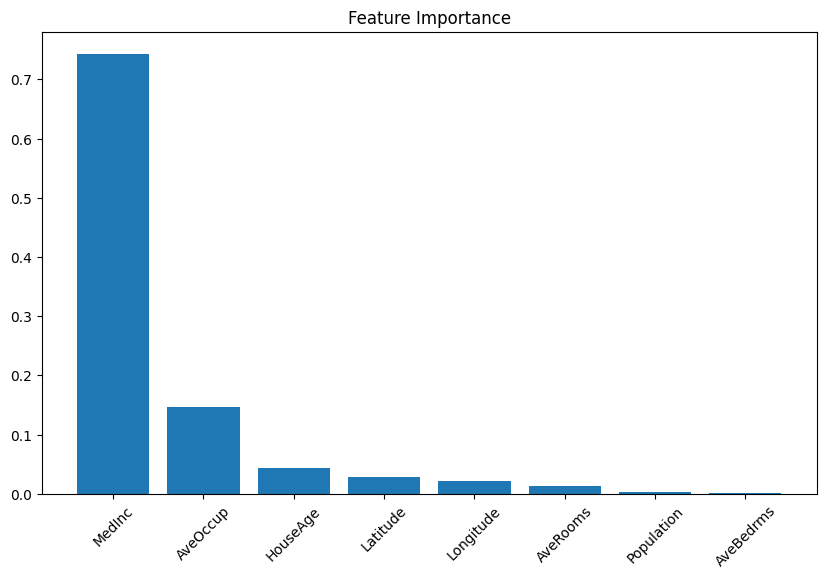

In [24]:
def plot_feature_importance(feature_names, importances):
    import matplotlib.pyplot as plt
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
    plt.title("Feature Importance")
    plt.show()


# Plot feature importance for Random Forest (example using scikit-learn tree feature_importances_)
rf_importances = [tree.feature_importances_ for tree in rf_model.trees]
avg_rf_importance = np.mean(rf_importances, axis=0)
plot_feature_importance(X.columns, avg_rf_importance)
